In [2]:
import torch


# Create a 2x4 tensor
m = torch.Tensor(2,4)
m
# Move your tensor to GPU device 0 if there is one (first GPU in the system)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device)
print(f'torch.cuda.is_available() = {torch.cuda.is_available()}')
print(f'torch.cuda.device_count() = {torch.cuda.device_count()}')
print(f'torch.cuda.current_device() = {torch.cuda.current_device()}')

torch.cuda.is_available() = True
torch.cuda.device_count() = 8
torch.cuda.current_device() = 0


In [3]:
import numpy

In [4]:
torch.sqrt(torch.tensor(2.0))

tensor(1.4142)

In [5]:
# What about all "*Tensor"
torch.*Tensor?

In [6]:
# Annotate your functions/classes!
torch.nn.Module?

In [7]:
%magic

In [8]:
# List all the files in the current directory
!ls -lh

total 0


In [ ]:
%%bash
#List all the files but with cleaner outputs for readability
for f in $(ls *.*); do
    echo $(wc -l $f)
done

ls: cannot access '*.*': No such file or directory


# Torch

In [ ]:
# Generate a tensor of size 2x3x4
t = torch.Tensor(2,3,4)
type(t)

torch.Tensor

In [ ]:
# Get the size of tensor
t.size()

torch.Size([2, 3, 4])

In [ ]:
# t.size() is a classic tuple =>
print('t size:', ' \u00D7 '.join(map(str, t.size())))

t size: 2 × 3 × 4


In [ ]:
# prints dimensional space and sub-dimensions
print(f'point in a {t.numel()} dimensional space')
print(f'point in a {t.dim()} dimensional space')

point in a 24 dimensional space
point in a 3 dimensional space


In [ ]:
t

tensor([[[-4.1314e+29,  4.3376e-41, -7.3362e-16,  3.2797e-41],
         [ 4.4842e-44,  0.0000e+00,  8.9683e-44,  0.0000e+00],
         [ 5.5232e-29,  3.2790e-41, -2.0777e+29,  4.3376e-41]],

        [[ 1.3713e-36,  4.3376e-41, -2.2708e+29,  4.3376e-41],
         [-2.0776e+29,  4.3376e-41, -2.2708e+29,  4.3376e-41],
         [ 1.2417e-36,  4.3376e-41,  9.1084e-44,  0.0000e+00]]])

In [ ]:
# Mind the underscore!
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
# In-place operations are cheap on CUDA Tensors with .storage_offset() == 0.
# See the CUDA NumPy compatibility guide for more detail.
t.copy_(torch.randn(2,3,4))

tensor([[[-0.2890,  0.8592,  1.2191,  1.0729],
         [ 0.7081,  0.1799,  1.2687, -0.8167],
         [-0.5488,  1.0650, -0.8293, -1.8052]],

        [[ 1.0673,  1.3211,  1.6640,  0.9754],
         [-1.0386, -1.4806, -0.2841, -1.4173],
         [ 1.5403, -0.1160,  1.2842,  0.6453]]])

In [ ]:
t.random_(10)

tensor([[[9., 9., 6., 1.],
         [5., 1., 0., 4.],
         [1., 1., 5., 3.]],

        [[6., 1., 1., 7.],
         [4., 1., 1., 6.],
         [4., 4., 8., 0.]]])

In [ ]:
t

tensor([[[9., 9., 6., 1.],
         [5., 1., 0., 4.],
         [1., 1., 5., 3.]],

        [[6., 1., 1., 7.],
         [4., 1., 1., 6.],
         [4., 4., 8., 0.]]])

In [ ]:
# resize the tensor permanently
r = torch.Tensor(t)
r

tensor([[[9., 9., 6., 1.],
         [5., 1., 0., 4.],
         [1., 1., 5., 3.]],

        [[6., 1., 1., 7.],
         [4., 1., 1., 6.],
         [4., 4., 8., 0.]]])

In [ ]:
r.resize_(3,8)

tensor([[9., 9., 6., 1., 5., 1., 0., 4.],
        [1., 1., 5., 3., 6., 1., 1., 7.],
        [4., 1., 1., 6., 4., 4., 8., 0.]])

In [ ]:
# As you can see zero_ would replace r with 0's which was originally filled with integers
r.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# This is important
s = r.clone()
s

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
s.fill_(1)

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
# Because we cloned r, even though we did an in-operation, this doesn't affect r
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

## 1-D Tensors/ Vectors

In [ ]:
# Creates a 1D of dimentions (1D) and size of tensor
v = torch.Tensor( [1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [ ]:
print(f'dim: {v.dim()}')
print(f'size: {v.size()}')
print(f'numel: {v.numel()}')

dim: 1
size: torch.Size([4])
numel: 4


In [ ]:
w = torch.Tensor( [1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [ ]:
# element-wise multiplication
v * w

tensor([1., 0., 6., 0.])

In [ ]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v@w

tensor(7.)

In [ ]:
# inplace replacement of random from 0 to 10
x = torch.Tensor(5)

In [ ]:
x

tensor([-4.1314e+29,  4.3376e-41, -4.1314e+29,  4.3376e-41,  4.4842e-44])

In [ ]:
x.random_(10)

tensor([0., 7., 6., 5., 5.])

In [ ]:
print(f'first: {x[0]}, last: {x[-1]}')

first: 0.0, last: 5.0


In [ ]:
# Extract sub-Tensor
x[1:2+1]

tensor([7., 6.])

In [2]:
import torch

In [ ]:
# Create a tensor with integers ranging from 1 to 5, excluding 5
v = torch.arange(1, 5)
v

tensor([1, 2, 3, 4])

In [ ]:
# Square all elements in the tensor
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


In [ ]:
torch.arange(0, 8, 3)

tensor([0, 3, 6])

In [ ]:
torch.linspace(3, 8, 20)

tensor([3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
        5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
        7.7368, 8.0000])

In [ ]:
torch.linspace(3,8, 20).view(1,-1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [ ]:
torch.linspace(3,8, 20).view(4,5)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526],
        [4.3158, 4.5789, 4.8421, 5.1053, 5.3684],
        [5.6316, 5.8947, 6.1579, 6.4211, 6.6842],
        [6.9474, 7.2105, 7.4737, 7.7368, 8.0000]])

## 2-D Tensors/ Vectors

In [ ]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [ ]:
# Create a 2x4 tensor
m = torch.Tensor(2,4)
m

tensor([[-3.5502e-16,  3.2797e-41, -4.1313e+29,  4.3376e-41],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])

In [ ]:
m.dim()

2

In [ ]:
m.size()

torch.Size([2, 4])

In [ ]:
# Move your tensor to GPU device 0 if there is one (first GPU in the system)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device)

tensor([[-3.5502e-16,  3.2797e-41, -4.1313e+29,  4.3376e-41],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])

In [ ]:
print(f'torch.cuda.is_available() = {torch.cuda.is_available()}')

torch.cuda.is_available() = False


In [33]:
import torch

In [34]:
data0 = torch.tensor(1.0).float()
#type
print(type(data0))
print(data0.dtype)

<class 'torch.Tensor'>
torch.float32


In [35]:
import numpy as np
# numpy array
x_np = np.arange(-2, 2.1, 0.25)

print(x_np)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [36]:
# torchで勾配計算用変数に変換

x = torch.tensor(x_np, requires_grad=True).float()

print(x)

tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], grad_fn=<ToCopyBackward0>)


In [37]:
# 2次関数を作成
y = 2 * x ** 2 + 3

print(y)

tensor([11.0000,  9.1250,  7.5000,  6.1250,  5.0000,  4.1250,  3.5000,  3.1250,
         3.0000,  3.1250,  3.5000,  4.1250,  5.0000,  6.1250,  7.5000,  9.1250,
        11.0000], grad_fn=<AddBackward0>)


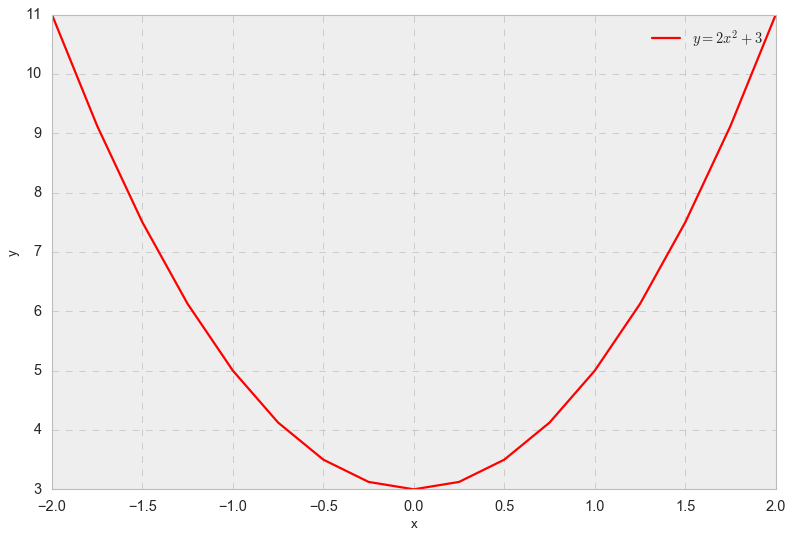

In [38]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

plt.plot(x.data, y.data, color="r", label=r"$y=2x^2+3$" )
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [39]:
z = y.sum()

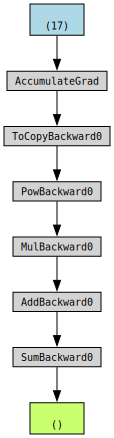

In [40]:
from torchviz import make_dot

g = make_dot(z, params={'x':x})
display(g)

In [41]:
# 勾配計算
z.backward()

In [42]:
print(x.grad)

None


/var/folders/dm/10pms4tx5cx6r5q38zn0mdgc0000gn/T/ipykernel_13914/3014308063.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  print(x.grad)
